In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from keras import models
import pandas as pd
from keras.preprocessing import image
import numpy as np

In [2]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
def breed_prediction(img):

    # chargement du modèle et des races
    final_model = models.load_model("/content/drive/MyDrive/cnn_final_fe120_aug.h5")

    classes = pd.read_csv("/content/drive/MyDrive/breeds_list.csv", sep=',', encoding='utf-8')
    classes = list(classes.loc[:, '0'])

    # Préparation d'une image d'entrée
    datagen = image.ImageDataGenerator(rescale=1./255)
    img = np.expand_dims(img, axis=0)
    img = datagen.flow(img)

    # Prédiction
    pred = final_model.predict(img)
    breed_pred = np.argmax(pred, axis=1)[0]
    breed_proba = round(100*pred[0][breed_pred])
    breed = classes[breed_pred]

    # Affichage de la prédiction
    print(str(breed_proba) + " % chance this is a " + breed + " dog")

In [5]:
final_model = models.load_model("/content/drive/MyDrive/cnn_final_fe120_aug.h5")

In [6]:
final_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 global_average_pooling2d_4  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_8 (Dense)             (None, 256)               524544    
                                                                 
 dense_9 (Dense)             (None, 120)               30840     
                                                                 
Total params: 21416864 (81.70 MB)
Trainable params: 555384 (2.12 MB)
Non-trainable params: 20861480 (79.58 MB)
_________________________________________________________________


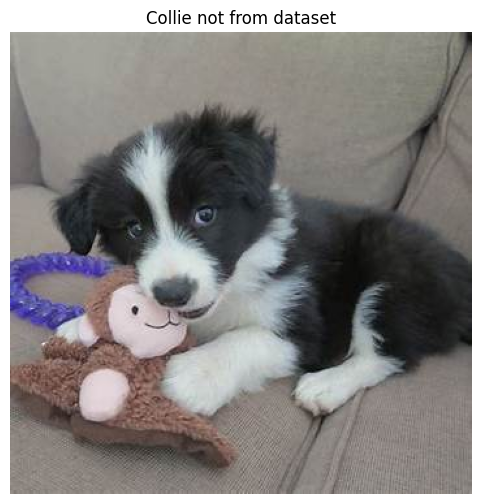

In [38]:
#Test avec une image hors dataset
img2 = mpimg.imread("/content/Dog.jpg")

#Affichage de l'image
plt.figure(figsize=(10,6))
plt.imshow(img2, cmap='gray')
plt.title("Collie not from dataset")
plt.axis('off')
plt.show()

In [39]:
breed_prediction(img2)

1/1 [==============================] - 1s 1s/step
45 % chance this is a Border_collie dog
